In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import glob

In [67]:
# grep -A 5 "Alternative indexing scores" dimple*/02-pointless.log | grep " 1 " > pointless_1.log
filename="../refine/pointless_1.log"
records=[]
file_id_old=-999 # since each entry is in the log twice
with open(filename) as file:
    for line in file:
        tmp=line.rstrip().split()
        # print(tmp)
        if tmp[1]=='1':
            file_id=tmp[0][7:11]
            if file_id != file_id_old:
                record=[file_id,tmp[2],float(tmp[3]),float(tmp[4]),float(tmp[5]),int(tmp[6]),float(tmp[7])]
                records.append(record)
                file_id_old=file_id
            else:
                pass
        else:
            print(tmp)

pointless_df=pd.DataFrame(data=records,columns=["file_id","symop","likelihood","CC","R(E)","nrefl","cell dev"])
pointless_df["reindexed"]=~(pointless_df["symop"]=='[h,k,l]')
pointless_df["reindexed"]=pointless_df["reindexed"].astype('int')
pointless_df=pointless_df.set_index(keys="file_id")
print("Read in number of entries: " + str(len(pointless_df.index)))
pointless_df.head()

Read in number of entries: 1679


,symop,likelihood,CC,R(E),nrefl,cell dev,reindexed
file_id,,,,,,,
0001,"[h,k,l]",0.816,0.540,0.341,67390,0.0,0
0002,"[-h,-k,l]",0.666,0.303,0.459,425,0.0,1
0004,"[h,k,l]",0.804,0.520,0.402,10442,0.0,0
0006,"[h,k,l]",0.827,0.556,0.341,58430,0.0,0
0009,"[-h,-k,l]",0.767,0.471,0.453,10833,0.0,1


In [69]:
# grep "Maximum and minimum Bragg" dimple*/????-unique.log > resolution.log
filename="../refine/resolution.log"
records=[]
with open(filename) as file:
    for line in file:
        tmp=line.rstrip().split()
        # print(tmp)
        if tmp[4]=='Bragg':
            file_id=tmp[0][7:11]
            record=[file_id,float(tmp[6])]
            records.append(record)
        else:
            print(tmp)

resolution_df=pd.DataFrame(data=records,columns=["file_id","Resolution"])
resolution_df=resolution_df.set_index(keys="file_id")
print("Read in number of entries: " + str(len(resolution_df.index)))
resolution_df.head()

Read in number of entries: 1679


,Resolution
file_id,
0001,1.559
0002,1.832
0004,2.328
0006,1.601
0009,1.522


In [104]:
# grep --text "info:  8/8" dimple*/dimple.log > dimple-stats.log
filename="../refine/dimple-stats.log"
records=[]
with open(filename) as file:
    for line in file:
        tmp=line.rstrip().split()
        # print(tmp)
        if tmp[2]=='R/Rfree':
            file_id=tmp[0][7:11]
            # print(file_id)
            initial=tmp[3].split('/')
            final=tmp[5].split('/')
            record=[file_id,float(initial[0]),float(initial[1]),float(final[0]),float(final[1])]
            records.append(record)
        else:
            print(tmp)

dimple_df=pd.DataFrame(data=records,columns=["file_id","Rwork-initial","Rfree-initial","Rwork-final","Rfree-final"])
dimple_df=dimple_df.set_index(keys="file_id")
print("Read in number of entries: " + str(len(dimple_df.index)))
dimple_df.head()

Read in number of entries: 1676


,Rwork-initial,Rfree-initial,Rwork-final,Rfree-final
file_id,,,,
0001,0.2666,0.2758,0.2188,0.2407
0002,0.2691,0.2882,0.2137,0.2483
0004,0.2768,0.2942,0.2067,0.2620
0006,0.2637,0.2750,0.2173,0.2416
0009,0.2648,0.2757,0.2172,0.2392


In [102]:
combined_df=pd.concat([dimple_df, resolution_df,pointless_df],join='outer',axis=1)
combined_df=combined_df.sort_values(by="Rfree-final",ascending=False)
combined_numeric=combined_df[["Rfree-final", "Resolution", "likelihood", "CC", "R(E)", "nrefl", "reindexed"]]

In [103]:
combined_df.to_pickle(os.path.join('../refine/dimple_refinement_stats.pkl'))
combined_df.head(20)

,Rwork-initial,Rfree-initial,Rwork-final,Rfree-final,Resolution,symop,likelihood,CC,R(E),nrefl,cell dev,reindexed
file_id,,,,,,,,,,,,
0162,0.6683,0.6866,0.6554,0.6945,2.095,"[-h,-k,l]",0.582,0.206,0.603,1230,0.0,1
0944,0.6427,0.6895,0.6148,0.6913,3.624,"[-h,-k,l]",0.702,0.501,0.486,2225,0.0,1
1377,0.5961,0.6641,0.5700,0.6565,2.783,"[h,k,l]",0.569,0.101,0.488,453,0.0,0
0568,0.6313,0.6435,0.5918,0.6443,3.551,"[h,k,l]",0.697,0.485,0.471,2311,0.0,0
1454,0.6249,0.6321,0.5912,0.6285,1.981,"[h,k,l]",0.651,0.227,0.465,407,0.0,0
1838,0.5993,0.6186,0.5731,0.6277,1.704,"[-h,-k,l]",0.623,0.176,0.485,415,0.0,1
1018,0.6027,0.6303,0.5855,0.6256,2.006,"[-h,-k,l]",0.658,0.351,0.539,1187,0.0,1
1709,0.5906,0.6395,0.5732,0.6242,3.529,"[h,k,l]",0.633,0.270,0.428,480,0.0,0
0686,0.5951,0.6091,0.5770,0.6224,2.019,"[-h,-k,l]",0.669,0.294,0.502,408,0.0,1


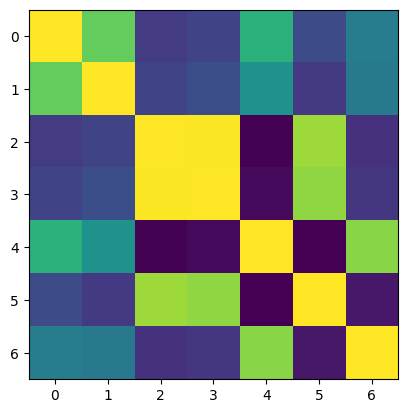

In [84]:
# import seaborn as sns
cor=combined_numeric.corr()
plt.imshow(cor)

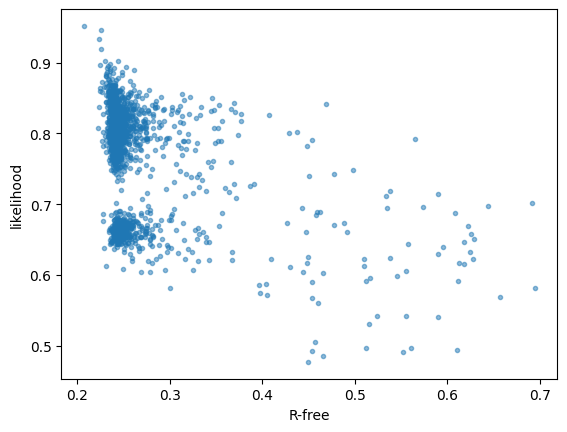

In [86]:
plt.plot(combined_df["Rfree-final"],combined_df["likelihood"],'.',alpha=0.5)
plt.xlabel("R-free")
plt.ylabel("likelihood")
plt.show()

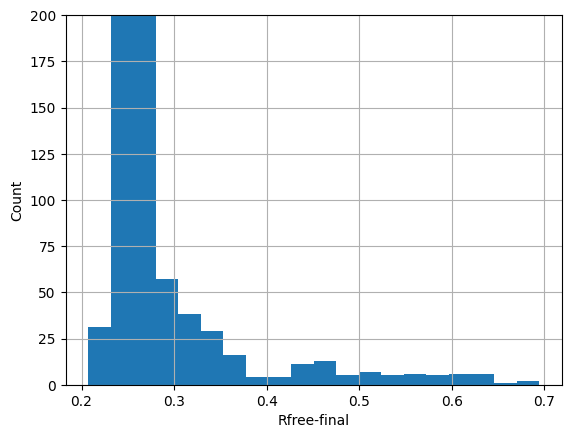

In [88]:
plt.hist(dimple_df["Rfree-final"],20)
plt.grid()
plt.xlabel("Rfree-final")
plt.ylabel("Count")
plt.ylim([0,200])
plt.show()

In [94]:
combined_df.loc[combined_df.index=='1157',:].head()

,Rwork-initial,Rfree-initial,Rwork-final,Rfree-final,Resolution,symop,likelihood,CC,R(E),nrefl,cell dev,reindexed
file_id,,,,,,,,,,,,
1157,0.2397,0.2602,0.2072,0.2465,1.936,"[-h,-k,l]",0.833,0.572,0.375,21610,0.0,1


Identify the missing entries.

In [105]:
phyllis_dir="/n/holyscratch01/hekstra_lab/phyllis/"
my_dir     ="/n/holyscratch01/hekstra_lab/dhekstra/valdo-tests/"
original_data_path = phyllis_dir + 'pipeline/data/original_data/'

basepath = my_dir + 'pipeline/'
data_path      = basepath + 'data/'
input_mtz_path = basepath + 'data/input_mtzs/'
mtzs_to_ignore=['0003.mtz']

# List of MTZ files to refine against
file_list = glob.glob(input_mtz_path + "*.mtz")
file_list.sort()


In [106]:
count=0
missing=[]
for file in file_list:
    id=os.path.basename(file)[0:4]
    if not (id in dimple_df.index):
        missing.append(file)
        print("Not yet processed: " + os.path.basename(file)[0:4])
        count+=1
print(str(count) + " not yet processed.")
print(missing)

Not yet processed: 0312
Not yet processed: 0946
Not yet processed: 1061
3 not yet processed.
['/n/holyscratch01/hekstra_lab/dhekstra/valdo-tests/pipeline/data/input_mtzs/0312.mtz', '/n/holyscratch01/hekstra_lab/dhekstra/valdo-tests/pipeline/data/input_mtzs/0946.mtz', '/n/holyscratch01/hekstra_lab/dhekstra/valdo-tests/pipeline/data/input_mtzs/1061.mtz']
